In [1]:
# Library_Import#############################
# from numpy import *
import math
import numpy as np
import matplotlib.pyplot as plt
# Library_Import_end##########################




In [2]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps
from numba import jit


# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../../programs' )
print("Add path : /../../../programs")

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

Add path : /../../../programs


<Figure size 800x1100 with 0 Axes>

In [3]:
try:
    import decorators
    import plot_tool
except ModuleNotFoundError as err:
    print(err)
    sys.path.append( str(current_dir) + '/programs' )
    print(sys.path)
    print("Add path : ./programs")
    import decorators
    import plot_tool

In [4]:
@decorators.stop_watch
def lms_off(myu, update, samp_n):
    """
    myu:step size  , update:update count

    smp_n:desired signal sample number

    """
    w = np.random.rand(d_size, 1)  # initial coefficient

    for n in np.arange(1, update, 1):
        # w = (np.eye(d_size, d_size)-np.array(myu)*matrix(R)) * \
        # J    matrix(w)+array(myu)*d[samp_n, 0]*matrix(x)
        w = np.dot((np.eye(d_size, d_size) - np.dot(np.array(myu), np.array(R))), np.array(w)) \
            + np.dot(np.dot(np.array(myu), d[samp_n, 0]), np.array(x))
        w_opt = w

    y_opt = np.dot(np.array(w_opt).T, np.array(x))

    return y_opt  # ADF 1 sample outdecorators.stop_watch

In [5]:
d_size = 50  # data size

t = np.array(np.linspace(0, d_size, d_size)).T
# d=array(sin(t))  #Desired Signal (sine wave)

d = np.random.rand(d_size, 1)  # Desired Signal (random signal)

x = np.random.rand(d_size, 1)  # ADF input

R = np.dot(np.array(x), np.array(x).T)  # E[x・x']

In [6]:
ADF_out = []
for j in np.arange(0, d_size, 1):
    ADF_buf = float(lms_off(0.03, 7, j))
    ADF_out.append(ADF_buf)  # ADF out

###############  START  ###############
###############  END  ###############
0.00085[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.00074[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.00062[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.00035[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.00033[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.00033[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.00044[sec] elapsed to execute the function:lms_off
###############  START  ###############
###############  END  ###############
0.000

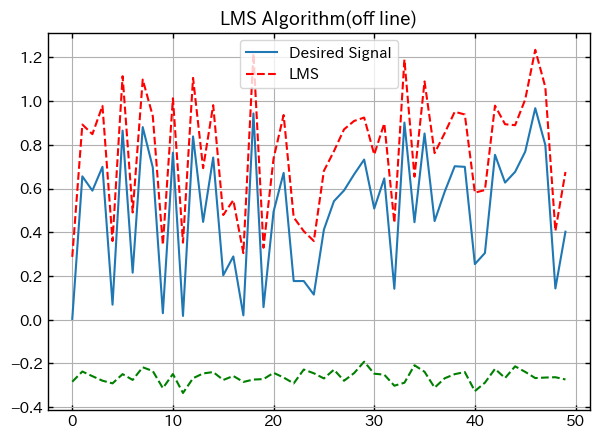

In [7]:

# _plot_command_############################
plt.figure(facecolor='w')  # Backgroundcolor_white
d = np.array(d)
ADF_out = np.array(ADF_out).reshape(len(ADF_out), 1)
plt.plot(d)
plt.plot(ADF_out, "r--")
plt.plot(d - ADF_out, "g--")
plt.grid()
plt.legend(('Desired Signal', 'LMS'))
plt.title('LMS Algorithm(off line)')
plt.show()
# _end_#####################################


In [8]:
d.shape

(50, 1)

In [9]:
ADF_out.shape

(50, 1)

In [10]:
from wave_process import wave_process

In [11]:
sys.path.append( str(current_dir) + '/../../../sample_wav' )
sample_wav = wave_process("../../../sample_wav/piano1_8do.wav")

分析対象ファイル： ../../../sample_wav/piano1_8do.wav
チャンネル数： 2
wavファイルのサンプリング周波数： 44100
wavファイルのデータ個数： 77440


In [12]:
d_size = sample_wav.chunk_size
# define time samples
t = np.array(np.linspace(0, d_size, d_size)).T

# Make desired value
# d=array(sin(t)) #sine wave
# d = np.random.rand(d_size, 1)
d = np.array(abs(sample_wav.data))
d = d.reshape(len(d), 1)
print(d.shape)

# Make filter input figures
x = np.random.rand(d_size, 1)

(77440, 1)


In [13]:
# ADF : Adaptive Filter
# Define output list
ADF_out = []
for j in np.arange(0, d_size, 1):
    end_con = float(lms_off(myu=0.5, update=20, samp_n=j))
    ADF_out.append(end_con)

###############  START  ###############


ValueError: operands could not be broadcast together with shapes (77440,77440) (50,50) 